# Linear regression with scaled numerical features

This challenge aims to investigate the impact of scaling numerical features on our linear regression model. Here are the steps you need to follow:

1. Apply `StandardScaler()` to the numerical subset of the train dataset

2. Create a dataframe with encoded categorical (from the previous challenge) and scaled numerical features for train dataset

3. Repeat the above steps on the train dataset

4. Build a linear regression model using the encoded categorical and scaled numerical features. Observe how R2 has changed from the last model you constructed in the previous challenge. How do you explain it?

In [1]:
import pandas as pd
import numpy as np
import statsmodels.tools.eval_measures as sm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# data pre-processing stack
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder ## research this - reads a string variable as a number 
from sklearn.compose import ColumnTransformer ## works alongside the above - keeps 'under the hood'.
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import (
    StandardScaler,
    KBinsDiscretizer
)

# machine learning stack
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# miscellaneous
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./data/cars_no_dupes.csv')

# features
X = df[['make', 'model', 'year', 'fuel', 'hp', 'cylinders', 'transmission',
       'drive', 'doors', 'mrk_cat', 'size', 'style', 'highway_mpg', 'city_mpg',
       'popularity']]

# target
y = df['price']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2,random_state=42)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

drop_column = 'mrk_cat'
X_train = X_train.drop(drop_column, axis=1)
X_test = X_test.drop(drop_column, axis=1)

In [3]:
s = X_train.groupby('make')['fuel'].describe(include='o')['top']

In [4]:
X_train['fuel']=X_train.apply(lambda x: 
    s[x['make']] if x['fuel'] != x['fuel'] else x['fuel'],
    axis=1
)

In [5]:
X_test['fuel']=X_test.apply(lambda x: 
    s[x['make']] if x['fuel'] != x['fuel'] else x['fuel'],
    axis=1
)

In [6]:
imputer1 = SimpleImputer(strategy='most_frequent')

imputer1.fit(X_train[['fuel']])

X_train['fuel'] = imputer1.transform(X_train[['fuel']])
X_test['fuel'] = imputer1.transform(X_test[['fuel']])

In [7]:
imputer2 = SimpleImputer(strategy='most_frequent')

imputer2.fit(X_train[['doors']])

X_train['doors'] = imputer2.transform(X_train[['doors']])
X_test['doors'] = imputer2.transform(X_test[['doors']])

In [8]:
imputer3 = SimpleImputer(strategy='mean')

imputer3.fit(X_train[['cylinders']])

X_train['cylinders'] = imputer3.transform(X_train[['cylinders']])
X_test['cylinders'] = imputer3.transform(X_test[['cylinders']])

In [9]:
imputer4 = SimpleImputer(strategy='mean')

imputer4.fit(X_train[['hp']])

X_train['hp'] = imputer4.transform(X_train[['hp']])
X_test['hp'] = imputer4.transform(X_test[['hp']])

In [10]:
df_train = pd.concat([X_train, y_train], axis=1)

In [11]:
df_test = pd.concat([X_test, y_test], axis=1)

In [12]:
imputed_df = pd.concat([df_train, df_test ], axis=0).reset_index(drop=True)

In [13]:
categorical_features = ['make','model','fuel','transmission','drive','size', 'style']

numerical_features = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg', 'popularity']

In [14]:
ohe = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')

In [15]:
ohe.fit(X_train[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [16]:
t = ohe.transform(X_train[categorical_features])

In [17]:
X_train_ohe = pd.DataFrame(t, columns= ohe.get_feature_names_out())

In [18]:
X_train_concat = pd.concat([X_train_ohe, X_train[numerical_features].reset_index(drop=True)], axis=1)

In [19]:
tst_ohe = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')

In [20]:
tst_ohe.fit(X_test[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [21]:
tst_array = tst_ohe.transform(X_test[categorical_features])

In [22]:
X_test_ohe = pd.DataFrame(tst_array, columns= tst_ohe.get_feature_names_out())

In [23]:
X_test_concat = pd.concat([X_test_ohe, X_test[numerical_features].reset_index(drop=True)], axis=1)

In [24]:
X_test_concat

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,style_Regular Cab Pickup,style_Sedan,style_Wagon,year,hp,cylinders,doors,highway_mpg,city_mpg,popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2012,255.0,8.0,3.0,15,11,5657
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2016,185.0,4.0,4.0,31,25,2202
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2012,152.0,4.0,4.0,23,19,481
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2015,173.0,4.0,4.0,26,19,1851
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2017,355.0,8.0,4.0,22,15,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2015,305.0,6.0,4.0,26,18,1385
2236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2017,310.0,6.0,4.0,30,20,204
2237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2007,252.0,6.0,4.0,21,16,481
2238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2013,562.0,8.0,2.0,17,13,2774


In [25]:
type(X_train_concat)

pandas.core.frame.DataFrame

## 1. Apply StandardScaler() to the numerical subset of the train dataset

In [26]:
X_train_concat.head()

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,style_Regular Cab Pickup,style_Sedan,style_Wagon,year,hp,cylinders,doors,highway_mpg,city_mpg,popularity
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1991,217.0,5.0,4.0,22,16,3105
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,2016,304.0,6.0,4.0,28,18,155
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2013,325.0,6.0,4.0,25,17,190
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2015,270.0,6.0,4.0,21,17,2031
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2011,420.0,8.0,4.0,25,16,190


In [27]:
X_train_concat.columns

Index(['make_Acura', 'make_Alfa Romeo', 'make_Aston Martin', 'make_Audi',
       'make_BMW', 'make_Bentley', 'make_Bugatti', 'make_Buick',
       'make_Cadillac', 'make_Chevrolet',
       ...
       'style_Regular Cab Pickup', 'style_Sedan', 'style_Wagon', 'year', 'hp',
       'cylinders', 'doors', 'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object', length=990)

In [28]:
numerical_features = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg', 'popularity']

In [29]:
scaler1 = StandardScaler()

In [30]:
scaler1.fit(X_train_concat[numerical_features])

StandardScaler()

In [31]:
s_train = scaler1.transform(X_train[numerical_features])
s_train

array([[-2.71648923, -0.3294254 , -0.36628913, ..., -0.51103293,
        -0.40675032,  1.10374311],
       [ 0.73134591,  0.4619232 ,  0.18967878, ...,  0.14860745,
        -0.19031769, -0.97194218],
       [ 0.31760569,  0.65293837,  0.18967878, ..., -0.18121274,
        -0.29853401, -0.9473154 ],
       ...,
       [ 0.31760569, -0.48405673, -0.92225704, ...,  0.47842764,
         0.13433124, -0.46674149],
       [-2.02692221, -0.62049615, -0.92225704, ..., -0.40109286,
        -0.51496663, -0.81644169],
       [ 0.73134591, -1.20263764, -0.92225704, ...,  2.56728885,
         3.70546956,  0.34805294]])

In [32]:
scal_train = pd.DataFrame(s_train, columns= scaler1.get_feature_names_out())
scal_train

,year,hp,cylinders,doors,highway_mpg,city_mpg,popularity
0,-2.716489,-0.329425,-0.366289,0.626475,-0.511033,-0.406750,1.103743
1,0.731346,0.461923,0.189679,0.626475,0.148607,-0.190318,-0.971942
2,0.317606,0.652938,0.189679,0.626475,-0.181213,-0.298534,-0.947315
3,0.593433,0.152661,0.189679,0.626475,-0.620973,-0.298534,0.348053
4,0.041779,1.517055,1.301615,0.626475,-0.181213,-0.406750,-0.947315
...,...,...,...,...,...,...,...
8954,0.179692,-0.756936,-0.366289,0.626475,0.478428,0.458980,-0.466741
8955,0.869259,-0.756936,-0.922257,0.626475,0.808248,0.567196,-0.466741
8956,0.317606,-0.484057,-0.922257,-1.658317,0.478428,0.134331,-0.466741
8957,-2.026922,-0.620496,-0.922257,0.626475,-0.401093,-0.514967,-0.816442


## 2. Create a dataframe with encoded categorical (from the previous challenge) and scaled numerical features for train dataset

In [33]:
drop_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg', 'popularity']

X_train_prep = X_train_concat.drop(drop_cols, axis=1)
X_train_prep

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,style_Convertible,style_Convertible SUV,style_Coupe,style_Crew Cab Pickup,style_Extended Cab Pickup,style_Passenger Minivan,style_Passenger Van,style_Regular Cab Pickup,style_Sedan,style_Wagon
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X_train_scaled = pd.concat(
    [X_train_prep, scal_train],
    axis=1
)

In [35]:
X_train_scaled

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,style_Regular Cab Pickup,style_Sedan,style_Wagon,year,hp,cylinders,doors,highway_mpg,city_mpg,popularity
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-2.716489,-0.329425,-0.366289,0.626475,-0.511033,-0.406750,1.103743
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.731346,0.461923,0.189679,0.626475,0.148607,-0.190318,-0.971942
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.317606,0.652938,0.189679,0.626475,-0.181213,-0.298534,-0.947315
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.593433,0.152661,0.189679,0.626475,-0.620973,-0.298534,0.348053
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.041779,1.517055,1.301615,0.626475,-0.181213,-0.406750,-0.947315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.179692,-0.756936,-0.366289,0.626475,0.478428,0.458980,-0.466741
8955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.869259,-0.756936,-0.922257,0.626475,0.808248,0.567196,-0.466741
8956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.317606,-0.484057,-0.922257,-1.658317,0.478428,0.134331,-0.466741
8957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-2.026922,-0.620496,-0.922257,0.626475,-0.401093,-0.514967,-0.816442


## 3. Repeat the above steps on the test dataset

In [36]:
X_test_concat.head()

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,style_Regular Cab Pickup,style_Sedan,style_Wagon,year,hp,cylinders,doors,highway_mpg,city_mpg,popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2012,255.0,8.0,3.0,15,11,5657
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2016,185.0,4.0,4.0,31,25,2202
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2012,152.0,4.0,4.0,23,19,481
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2015,173.0,4.0,4.0,26,19,1851
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2017,355.0,8.0,4.0,22,15,1385


In [37]:
numerical_features = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg', 'popularity']

In [70]:
s_test=scaler1.transform(X_test_concat[numerical_features])

In [71]:
scal_test = pd.DataFrame(s_test, columns= scaler1.get_feature_names_out())
scal_test

,year,hp,cylinders,doors,highway_mpg,city_mpg,popularity
0,0.179692,0.016221,1.301615,-0.515921,-1.280613,-0.947832,2.899387
1,0.731346,-0.620496,-0.922257,0.626475,0.478428,0.567196,0.468372
2,0.179692,-0.920663,-0.922257,0.626475,-0.401093,-0.082101,-0.742561
3,0.593433,-0.729648,-0.922257,0.626475,-0.071273,-0.082101,0.221401
4,0.869259,0.925817,1.301615,0.626475,-0.511033,-0.514967,-0.106487
...,...,...,...,...,...,...,...
2235,0.593433,0.471019,0.189679,0.626475,-0.071273,-0.190318,-0.106487
2236,0.869259,0.516499,0.189679,0.626475,0.368488,0.026115,-0.937465
2237,-0.509875,-0.011067,0.189679,0.626475,-0.620973,-0.406750,-0.742561
2238,0.317606,2.808681,1.301615,-1.658317,-1.060733,-0.731399,0.870844


In [72]:
drop_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg', 'popularity']

X_test_prep = X_test_concat.drop(drop_cols, axis=1)
X_test_prep

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,style_Convertible,style_Convertible SUV,style_Coupe,style_Crew Cab Pickup,style_Extended Cab Pickup,style_Passenger Minivan,style_Passenger Van,style_Regular Cab Pickup,style_Sedan,style_Wagon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
X_test_scaled = pd.concat(
    [X_test_prep, scal_test],
    axis=1
)

In [74]:
X_test_scaled

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,style_Regular Cab Pickup,style_Sedan,style_Wagon,year,hp,cylinders,doors,highway_mpg,city_mpg,popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.179692,0.016221,1.301615,-0.515921,-1.280613,-0.947832,2.899387
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.731346,-0.620496,-0.922257,0.626475,0.478428,0.567196,0.468372
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.179692,-0.920663,-0.922257,0.626475,-0.401093,-0.082101,-0.742561
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.593433,-0.729648,-0.922257,0.626475,-0.071273,-0.082101,0.221401
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.869259,0.925817,1.301615,0.626475,-0.511033,-0.514967,-0.106487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.593433,0.471019,0.189679,0.626475,-0.071273,-0.190318,-0.106487
2236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.869259,0.516499,0.189679,0.626475,0.368488,0.026115,-0.937465
2237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.509875,-0.011067,0.189679,0.626475,-0.620973,-0.406750,-0.742561
2238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.317606,2.808681,1.301615,-1.658317,-1.060733,-0.731399,0.870844


## 4. Build a linear regression model using the encoded categorical and scaled numerical features. Observe how R2 has changed from the last model you constructed in the previous challenge. How do you explain it?

In [57]:
X_test_scaled

,make_Acura,make_Alfa Romeo,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Bugatti,make_Buick,make_Cadillac,make_Chevrolet,...,style_Regular Cab Pickup,style_Sedan,style_Wagon,year,hp,cylinders,doors,highway_mpg,city_mpg,popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.170385,0.008490,1.297052,-0.540017,-1.350669,-0.967159,2.610487
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.731035,-0.632119,-0.953141,0.619751,0.535111,0.602804,0.361278
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.170385,-0.934121,-0.953141,0.619751,-0.407779,-0.070038,-0.759095
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.590873,-0.741938,-0.953141,0.619751,-0.054195,-0.070038,0.132777
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.871198,0.923647,1.297052,0.619751,-0.525640,-0.518598,-0.170590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.590873,0.466069,0.171955,0.619751,-0.054195,-0.182178,-0.170590
2236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.871198,0.511827,0.171955,0.619751,0.417250,0.042103,-0.939422
2237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.530427,-0.018964,0.171955,0.619751,-0.643501,-0.406458,-0.759095
2238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.310548,2.818022,1.297052,-1.699784,-1.114946,-0.742879,0.733651


In [83]:
model = make_pipeline(LinearRegression())

In [84]:
model.fit(X_train_scaled,y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [85]:
training_score = model.score(X_train_scaled,y_train)
print(f'training score: {round(training_score,6)}')

training score: 0.989548


In [86]:
pred_price = model.predict(X_train_scaled)

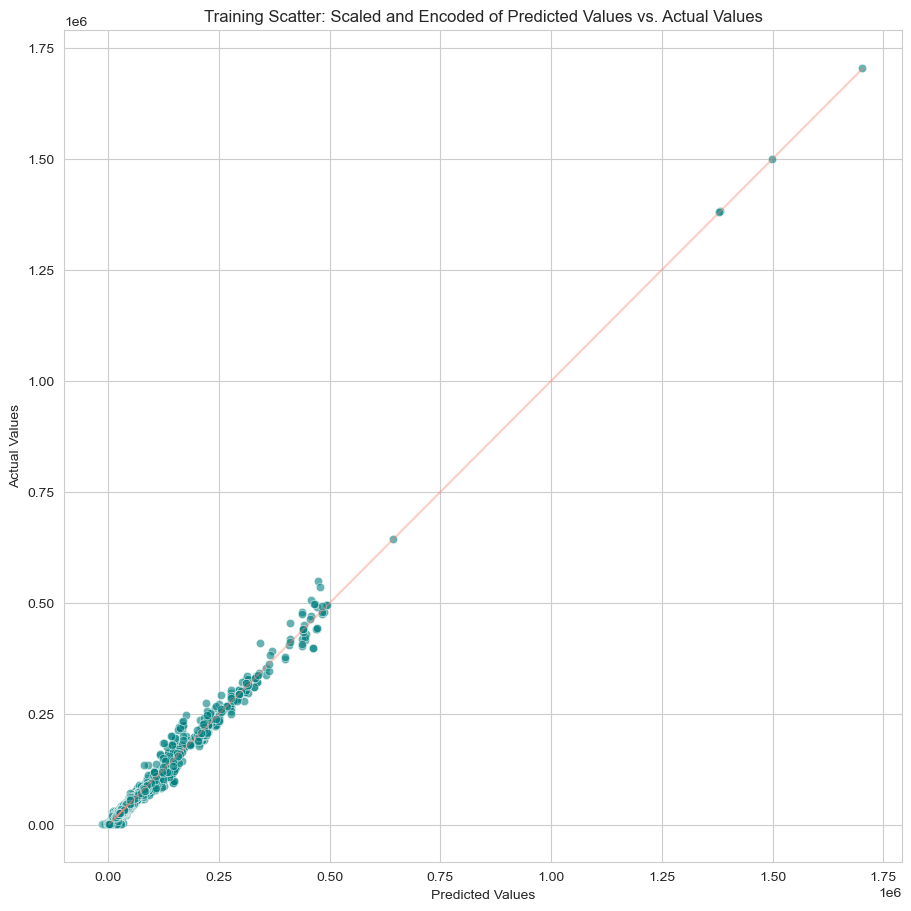

In [87]:
plt.figure(figsize=(9,9),layout='constrained')
sns.scatterplot(x = pred_price, y = y_train, color = 'teal', alpha = 0.6)
sns.lineplot(x = y_train, y = y_train, color = 'salmon', alpha = 0.4)

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Training Scatter: Scaled and Encoded of Predicted Values vs. Actual Values');

plt.savefig('./training_scaled_encoded')

In [88]:
model.fit(X_test_scaled,y_test)

Pipeline(steps=[('linearregression', LinearRegression())])

In [89]:
test_score = model.score(X_test_scaled,y_test)
print(f'test score: {round(test_score,6)}')

test score: 0.978719


In [92]:
test_pred_price = model.predict(X_test_scaled)

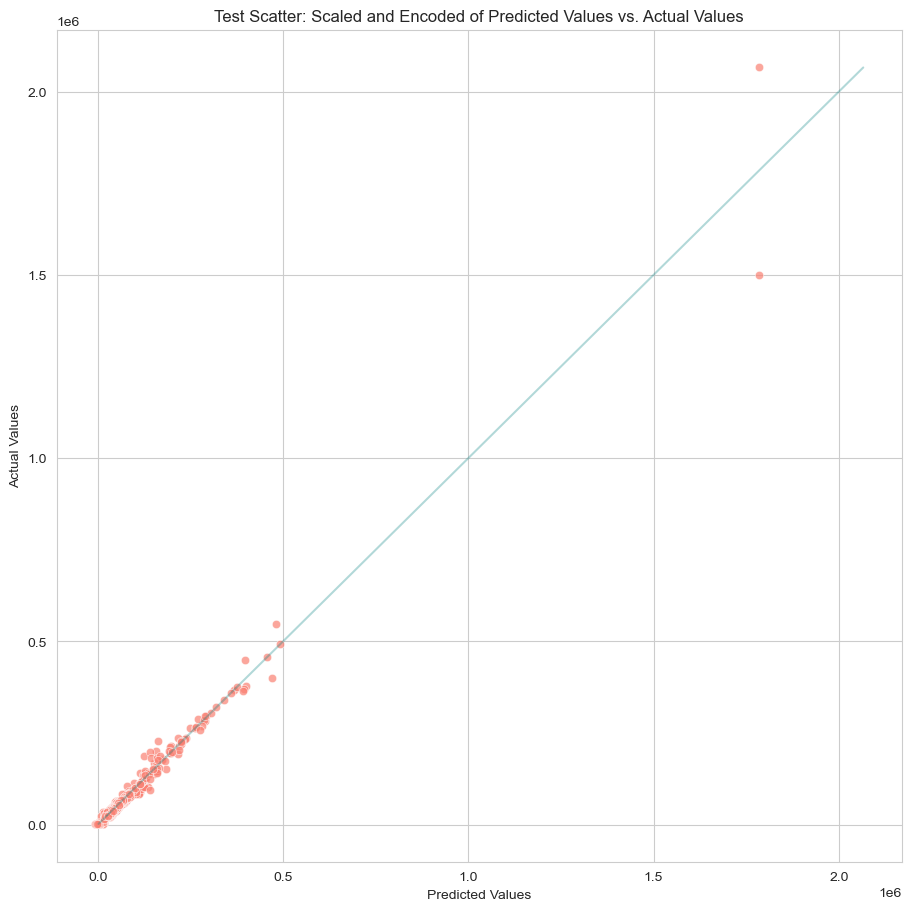

In [94]:
plt.figure(figsize=(9,9),layout='constrained')
sns.scatterplot(x = test_pred_price, y = y_test, color = 'salmon', alpha = 0.7)
sns.lineplot(x = y_test, y = y_test, color = 'teal', alpha = 0.3)

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Test Scatter: Scaled and Encoded of Predicted Values vs. Actual Values');

plt.savefig('./test_scaled_encoded')